# Table of Contents
* [Intro](#Intro)
	* [Resources and Links](#Resources-and-Links)
* [Load and Plot Image](#Load-and-Plot-Image)
* [Image from array](#Image-from-array)
	* [Morphological Operations](#Morphological-Operations)
	* [Convolution Filters](#Convolution-Filters)


# Intro

Notebook that explores the basics of image processing in Python, like image loading, representation and transformations.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

sns.set_style("dark")

# Load and Plot Image

In [5]:
img_path = os.path.join(os.path.pardir, 'resources', 'mona_lisa.jpg')

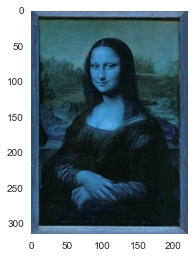

In [6]:
# Load with open-cv
import cv2
img = cv2.imread(img_path)
sns.plt.imshow(img)
sns.plt.show()

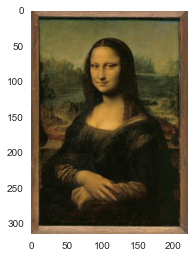

In [7]:
# Load with scikit
from skimage import io
img = io.imread(img_path)
sns.plt.imshow(img)
sns.plt.show()

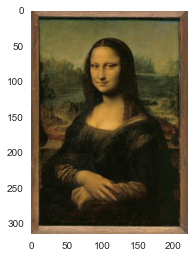

In [8]:
# Load with PIL
from PIL import Image
with Image.open(img_path) as img:
    sns.plt.imshow(img.convert(mode='RGB'))
    sns.plt.show()

# Image from array

In [9]:
# dummy list of strings representing our image
a = ["0000000000",
     "0111111100",
     "0000111100",
     "0000111100",
     "0001111100",
     "0000111100",
     "0001100000",
     "0000000000",
     "0000000000"]

In [10]:
# build numpy array of 0s and 1s from previous list
a = np.array([list(map(int, s)) for s in a], dtype=np.float32)
a.shape

(9, 10)

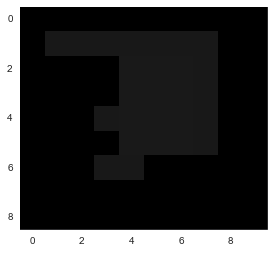

In [11]:
# plot image
plt.imshow(a, cmap='gray', interpolation='none', vmin=0, vmax=10)
plt.show()

## Morphological Operations

In [12]:
from skimage import morphology
b = np.array([[1,1,1],
            [1,1,1],
            [1,1,1]])
res = morphology.binary_dilation(a, b).astype(np.uint8)
res = morphology.binary_erosion(res, b).astype(np.uint8)

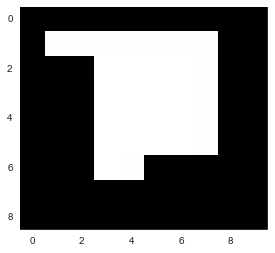

In [13]:
plt.imshow(res, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

In [14]:
b = np.array([[0,0,0,0],
            [0,1,1,0],
            [0,0,0,0]])
s = np.array([[1,0],
              [1,1]])

In [15]:
res = morphology.binary_dilation(b, s).astype(np.uint8)
res

array([[1, 1, 0, 0],
       [1, 1, 1, 0],
       [0, 0, 0, 0]], dtype=uint8)

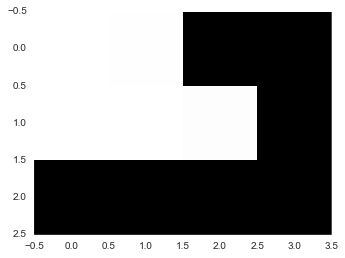

In [16]:
plt.imshow(res, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

## Convolution Filters

In [17]:
from scipy import ndimage
from skimage import data

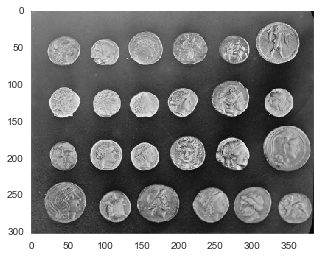

In [18]:
image = data.coins()
plt.imshow(image, cmap='gray', interpolation='none', vmin=0, vmax=255)
plt.show()

In [19]:
k = np.array([[1/16,1/8,1/16],
            [1/18,1,1/8],
            [1/16,1/8,1/16]])
n_image = ndimage.convolve(image, k, mode='constant', cval=0.0)

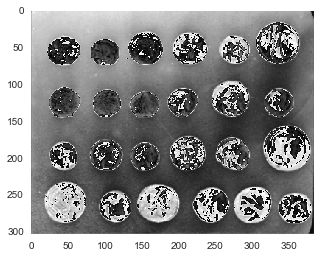

In [20]:
plt.imshow(n_image, cmap='gray', interpolation='none', vmin=0, vmax=255)
plt.show()